In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
from Data import Data
from Pha3D import Pha3D
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
#GIT = 'https://github.com/tyokokur/tmpdat/raw/main/sysg3/'
#''' If SSL error _ssl.c:997: 
#    pip install --upgrade certifi'''

from sysg3_data import *


leg_labs=['Micelle', 'Iso. Stripe', 'Fused Stripe', 'Hole', 'Cylinder', 'Cyl. Necklace', 'Cyl. Stripe', 'Raised Stripe', 'Homogeneous']

tjy_udf:  ['CalcF', 'H_find', 'Heights', 'Kap_D', 'elread', 'get_fp', 'get_fs', 'git_sync', 'lighten_color', 'phread', 'phreadxyz', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [2]:
## Local
fp_work, fp_home = 'C:/Users/takas/Downloads/', 'E:/Downloads/' 
fp = fp_work

## Files needed locally
f1_fnames = []

f3_fnames = ['ph_a10s25e3_mic5-1.dat', 'ph_a10s375e3_str3-2.dat', 'ph_a10s5e3_hol15-3.dat', 'ph_a10s625e3_fus2-1.dat', 'ph_a10s010_hom-1.dat']
f3_boxes  = [(19.4, 16.8, 40.2), (14.6, 20.2, 32.2), (27.2, 32.2, 36.2), (21.2, 20.2, 40.2), (20.2, 20.2, 48.2)]

f5_fnames = ['mic', 'ph_a25s010_cp4-2_T.dat', 'ph_a25s025_pn6-2.dat', 'ph_a25s040_str2-1.dat', 'ph_a25s055_hom2-1.dat']
f5_boxes  = [(0,0,0), (12.2, 21.2, 54.2), (12.2, 21.8, 70.2), (14.6, 20.2, 81.2), (20.2, 20.2, 90.2)]

f7_fnames = ['cyl-str', 'ph_a30s040_vor4-2.dat', 'ph_a30s040_hom-2.dat']
f7_boxes  = [(0,0,0), (18.2, 18.2, 90.2), (15.2, 15.2, 75.2)]

# Figure 1

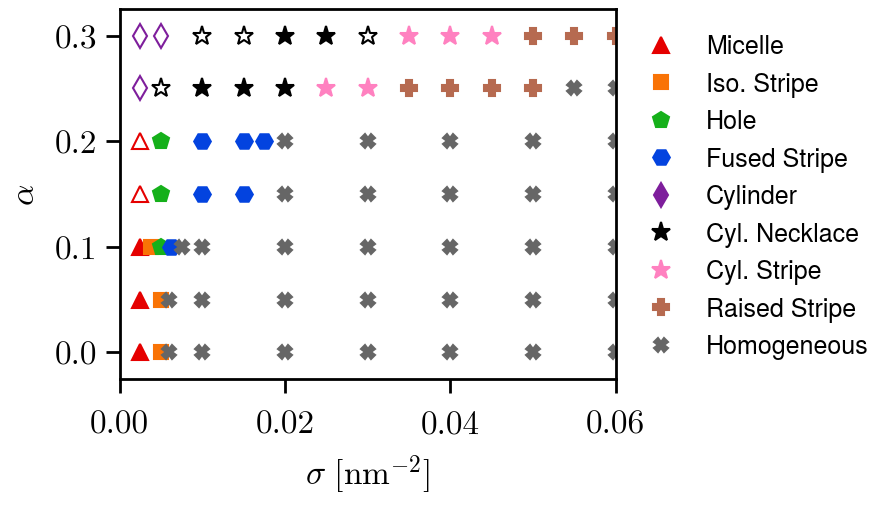

In [3]:
morph_ms = {
    'mic': {'marker':'^', 'c':'xkcd:red'  , 'ms':12}, 
    'str': {'marker':'s', 'c':'xkcd:orange', 'ms':10}, 
    'hol': {'marker':'p', 'c':'xkcd:green' , 'ms':12}, 
    'fus': {'marker':'H', 'c':'xkcd:blue', 'ms':12}, 
    'cyl': {'marker':'d', 'c':'xkcd:purple', 'ms':12},
    'cyl-pn': {'marker':'*', 'c':'xkcd:black', 'ms':14},
    'cyl-str': {'marker':'*', 'c':'xkcd:pink', 'ms':14},
    'raised': {'marker':'P', 'c':'xkcd:clay', 'ms':12},
    'hom': {'marker':'X', 'c':'0.4' , 'ms':10}
}
leg_ms = [Line2D([0],[0], **morph_ms[mor], lw=0) for mor in morph_ms.keys()]
leg_labs=['Micelle', 'Iso. Stripe', 'Hole', 'Fused Stripe', 'Cylinder', 'Cyl. Necklace', 'Cyl. Stripe', 'Raised Stripe', 'Homogeneous']

def get_Morph(a,s):
    AX = All.all[All.all.loc[:,'alpha'] == a]
    AXSY = AX[AX.loc[:,'sigma'] == s].reset_index()
    return AXSY.morph[np.nanargmin([i.minF() for i in AXSY.data])], min([i.minF() for i in AXSY.data]), AXSY.multi[np.nanargmin([i.minF() for i in AXSY.data])], AXSY.done.to_list()

# Not { (0.0, 7e-03), (0.05, 7e-03), (0.1, 1.25e-02), (0.1, 6.25e-03), (0.2, 0.022), (0.2, 0.025), (0.2, 0.027) [(0.225,i) for i in (2.5e-02, 2.75e-02, 3e-02)] 
#       (0.25, 2.7e-02), (0.25, 3.25e-02), (0.30, 3.25e-02) }

for (a,s) in [(0.00, i) for i in (2.5e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.05, i) for i in (2.5e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.10, i) for i in (2.5e-03, 3.75e-03, 5e-03, 6.25e-03, 7.5e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.15, i) for i in (2.5e-03, 5e-03, 1e-02, 1.5e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.20, i) for i in (2.5e-03, 5e-03, 1e-02, 1.5e-02, 1.75e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.25, i) for i in (2.5e-03, 5e-03, 1e-02, 1.5e-02, 2e-02, 2.5e-02, 3e-02, 3.5e-02, 4.0e-02, 4.5e-02, 5e-02, 5.5e-02, 6e-02)] +\
             [(0.30, i) for i in (2.5e-03, 5e-03, 1e-02, 1.5e-02, 2e-02, 2.5e-02, 3e-02, 3.5e-02, 
                                  4e-02, 4.5e-02, 5e-02, 5.5e-02, 6.0e-02)]:
    try: morph, minF, mul, done = get_Morph(a,s)
    except ValueError: 
        print("Error: Couldn't find {}, {}".format(a, s))
        break
    x,y,mor = s, a, morph
    
    if done == [True]*len(done): 
        if mul:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc=tjy.lighten_color(morph_ms[mor]['c'], 0.3))
        else:     plt.plot(x,y, lw=0, **morph_ms[mor])
    else:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc='w')

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
plt.xlim(0, 0.060)
plt.ylabel(r'$\alpha$', fontsize=24)
plt.ylim(-0.025,0.325)
plt.legend(leg_ms, leg_labs, loc=(1.02,0.025), fontsize=18)
plt.tick_params(axis='both', direction='out', length=10, labelsize=24)
tjy.ticks()

# Figure 2

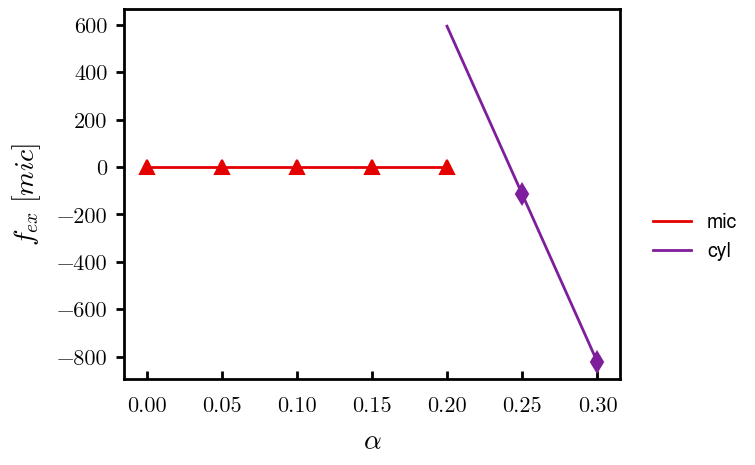

In [4]:
f = plotF('sigma', 2.5e-03, ('mic', 'cyl'), ref_morph='mic', morph_xxs = {'cyl': (0.2, 0.3)}, 
          show_raw=True, k_dict = {'mic': 3, 'cyl': 1}, s_dict = {'mic':1e-07, 'cyl':1e-01}
)

# Figure 3

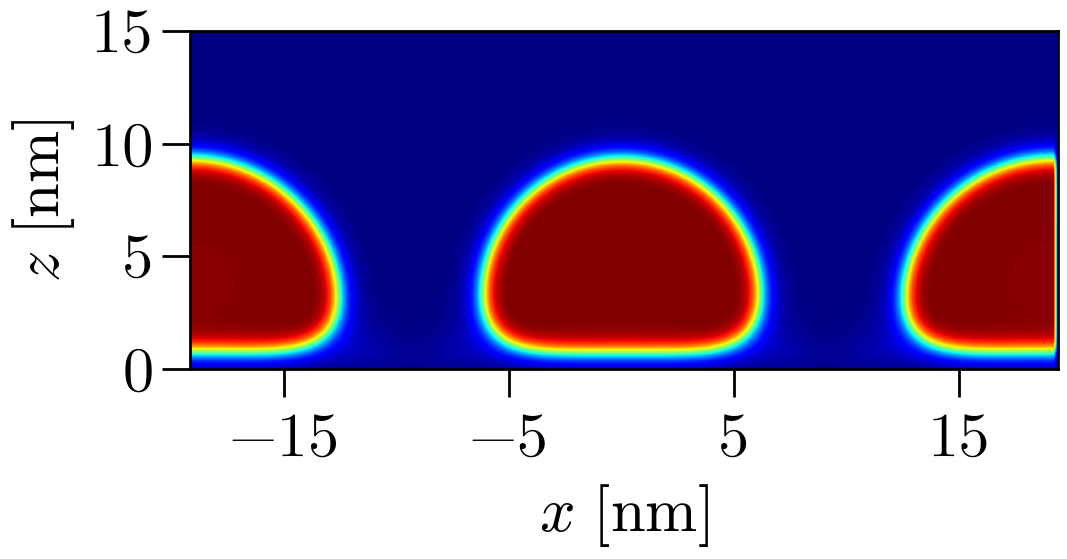

In [26]:
pha3d = Pha3D(f3_fnames[0], f3_boxes[0], discs=(0.20,0.20,0.20), fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xz', yslice=0.0,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=45)
h.axes[0].set_ylabel(r'$z\ [\mathrm{nm}]$', fontsize=45)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=45)
h.axes[0].set_xticks([-15, -5, 5, 15])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.show()

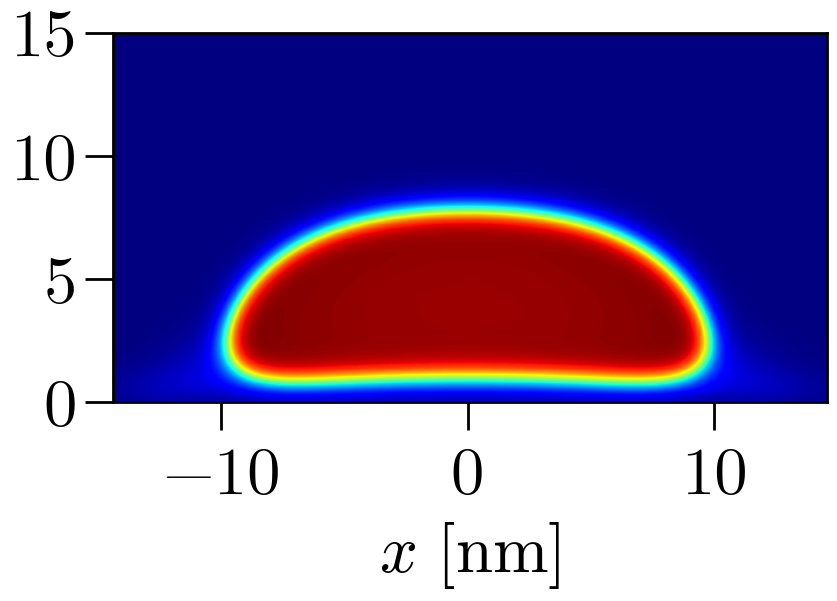

In [18]:
pha3d = Pha3D(f3_fnames[1], f3_boxes[1], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xz', yslice=f3_boxes[2][1]/2,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=48)
h.axes[0].set_ylabel(r'', fontsize=40)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=48)
h.axes[0].set_xticks([-10, 0, 10])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.show()

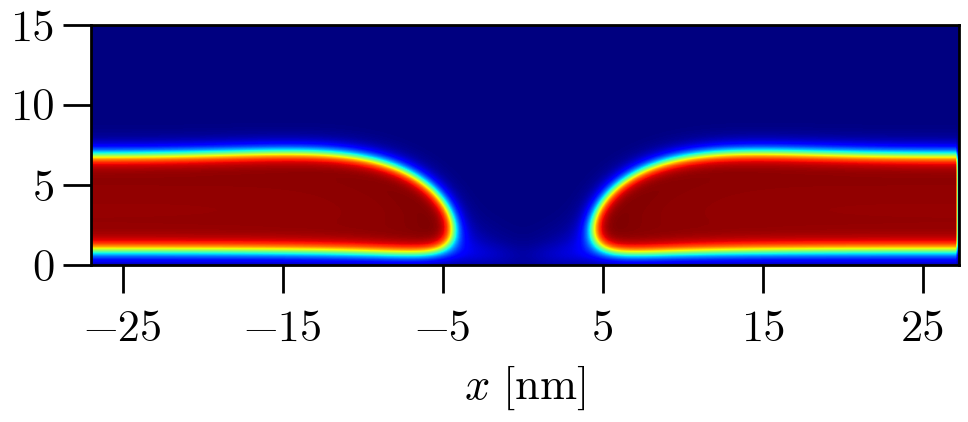

In [19]:
pha3d = Pha3D(f3_fnames[2], f3_boxes[2], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xz', yslice=f3_boxes[2][1]/2,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=32)
h.axes[0].set_ylabel(r'', fontsize=40)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=32)
h.axes[0].set_xticks([-25, -15, -5, 5, 15, 25])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.show()

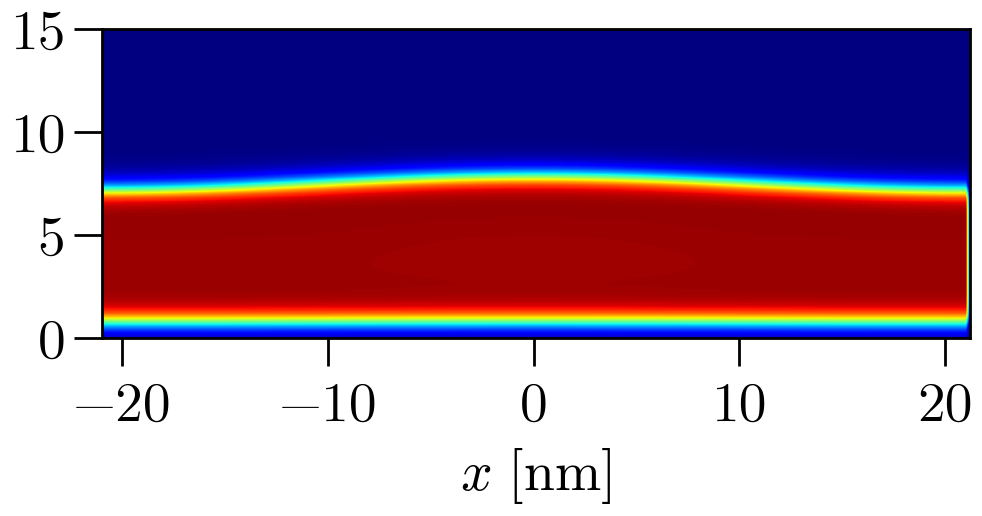

In [20]:
pha3d = Pha3D(f3_fnames[3], f3_boxes[3], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xz', yslice=0.0,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=40)
h.axes[0].set_ylabel(r'', fontsize=40)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=40)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.show()

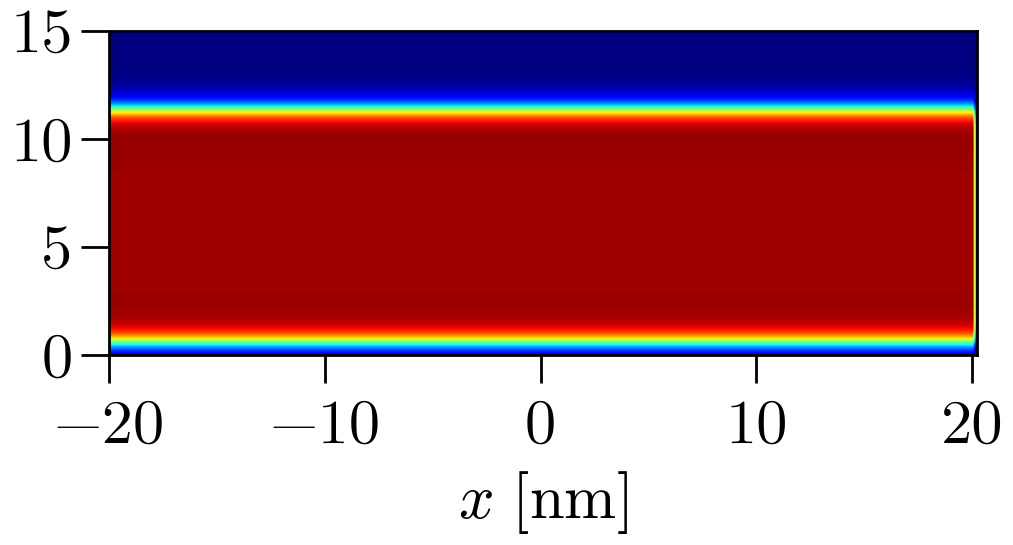

In [21]:
pha3d = Pha3D(f3_fnames[4], f3_boxes[4], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xz', yslice=0.0, zslice=5,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=45)
h.axes[0].set_ylabel(r'', fontsize=45)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=45)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.show()

# Figure 4

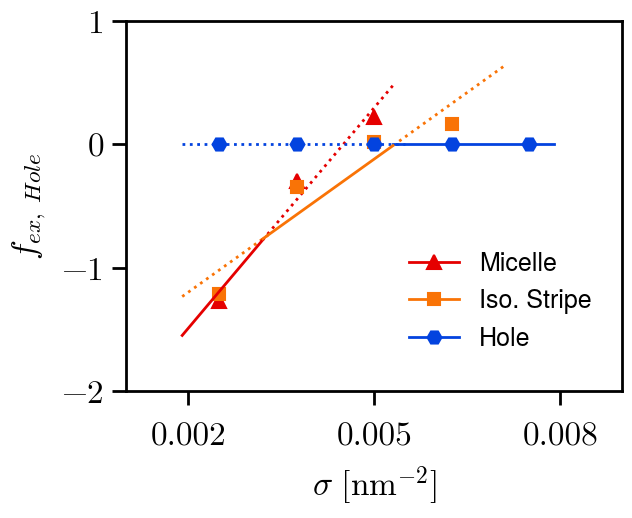

In [2]:
f = plotF('alpha', 0.10, ('mic', 'str', 'hol'), ref_morph='hol', 
          morph_xxs = {'mic': (2e-03, 5.5e-03), 'str': (2e-03, 7e-03), 'hol': (0.002, 0.008)},
          meta_xxs = {'mic': [[0.0033, 0.0053]], 'str': [[0.002, 0.0033], [0.0055, 0.007]], 'hol': [[0.002, 0.0054]]}, 
          show_raw=True, s_dict = {'hol':1e-07, 'mic':1e-01, 'str':2e-01}, k_dict = {'mic': 1, 'str': 1, 'hol': 3}
)
plt.xlim(0.001, 0.009)
plt.ylim(-2.00, 1.00)

plt.legend(handles=[
    Line2D([0], [0], **morph_ms['mic'], label='Micelle'),
    Line2D([0], [0], **morph_ms['str'], label='Iso. Stripe'),
    Line2D([0], [0], **morph_ms['hol'], label='Hole')
], loc=(0.55, 0.08), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
f[0].axes[0].set_xticks([0.002, 0.005, 0.008])
plt.ylabel(r'$f_{ex,\ Hole}$', fontsize=24)
tjy.ticks()

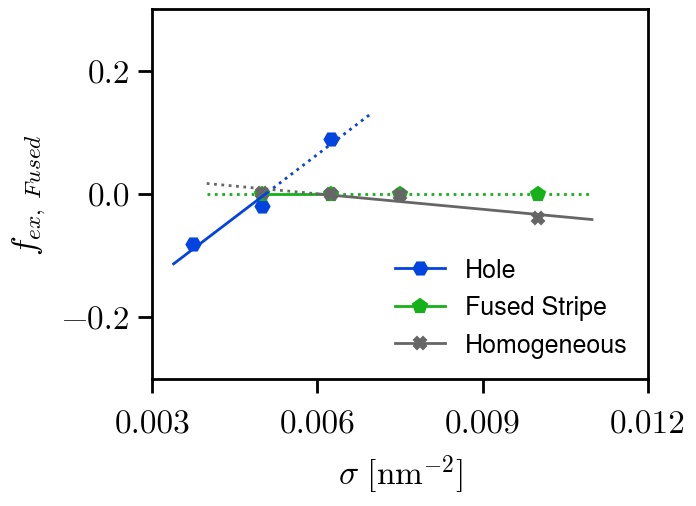

In [16]:
f = plotF('alpha', 0.10, ('hol', 'fus', 'hom'), ref_morph='fus', 
          morph_filter = {'hol':(0.003, 0.0063), 'hom': (0.005, 0.011), 'fus': (0.004, 0.011)}, 
          morph_xxs = {'hol': (0.0034, 0.007), 'hom':(0.004, 0.011)},
          meta_xxs = {'hol': [[0.0051, 0.007]], 'fus': [[0.004, 0.005], [0.0062, 0.011]], 'hom': [[0.004, 0.006]]},
          show_raw=True, s_dict = {'hol':1e-01, 'fus':1e-07, 'hom':1e-01}, k_dict = {'hol': 1, 'fus': 3, 'hom': 1}
)
plt.xlim(0.003, 0.012)
plt.ylim(-0.30, 0.30)

plt.legend(handles=[
    Line2D([0], [0], **morph_ms['hol'], label='Hole'),
    Line2D([0], [0], **morph_ms['fus'], label='Fused Stripe'),
    Line2D([0], [0], **morph_ms['hom'], label='Homogeneous')
], loc=(0.47, 0.03), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
f[0].axes[0].set_xticks([0.003, 0.006, 0.009, 0.012])
plt.ylabel(r'$f_{ex,\ Fused}$', fontsize=24)
tjy.ticks()

# Figure 5

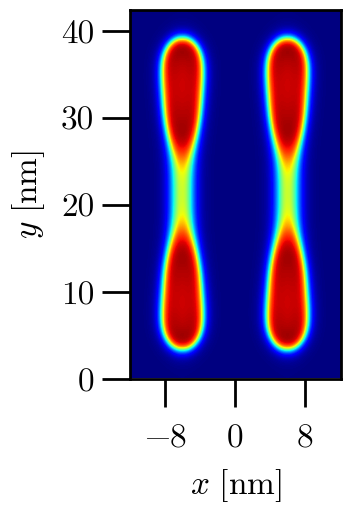

In [13]:
pha3d = Pha3D(f5_fnames[1], f5_boxes[1], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xy', yslice=0.0, zslice=24,
                    zmax=15.0, reflect_box=True, reflect_over='nw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=24)
h.axes[0].set_ylabel(r'$y\ [\mathrm{nm}]$', fontsize=24)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=24)
h.axes[0].set_xticks([-8, 0, 8])
h.axes[0].set_yticks([0, 10, 20, 30, 40])
plt.show()

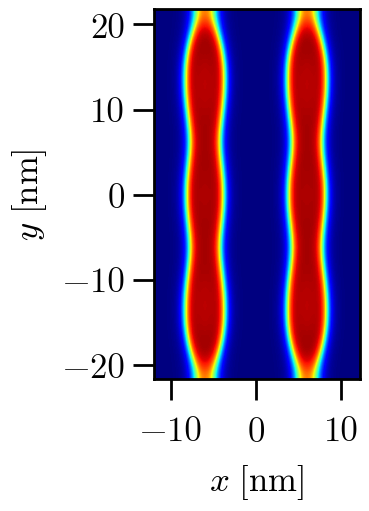

In [26]:
pha3d = Pha3D(f5_fnames[2], f5_boxes[2], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xy', yslice=0.0, zslice=35.6,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].set_ylabel(r'$y\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].tick_params(axis='both', direction='out', length=15, labelsize=25)
h.axes[0].set_xticks([-10, 0, 10])
h.axes[0].set_yticks([-20, -10, 0, 10, 20])
plt.show()

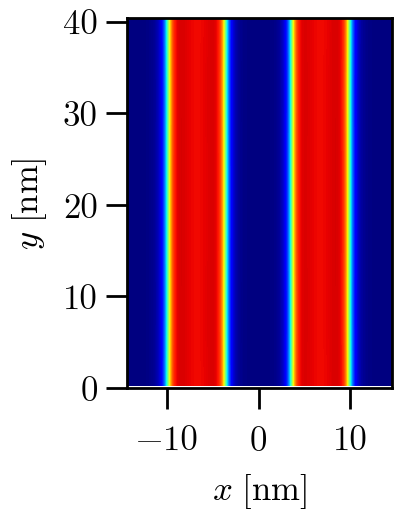

In [13]:
pha3d = Pha3D(f5_fnames[3], f5_boxes[3], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xy', yslice=0.0, zslice=45,
                    zmax=15.0, reflect_box=True, reflect_over='nw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].set_ylabel(r'$y\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].tick_params(axis='both', direction='out', length=15, labelsize=25)
h.axes[0].set_xticks([-10, 0, 10])
h.axes[0].set_yticks([0, 10, 20, 30, 40])
plt.show()

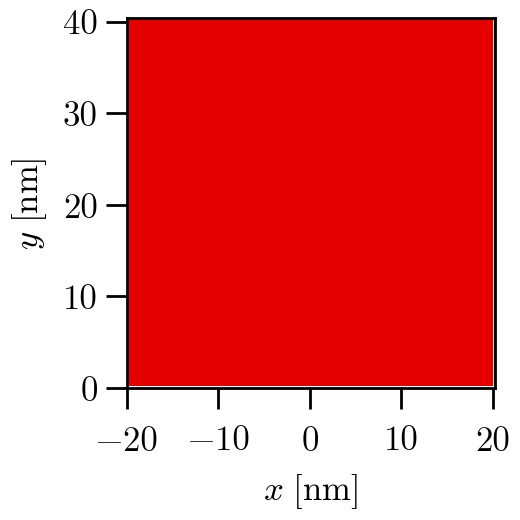

In [6]:
pha3d = Pha3D(f5_fnames[4], f5_boxes[4], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xy', yslice=0.0, zslice=50,
                    zmax=15.0, reflect_box=True, reflect_over='nw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].set_ylabel(r'$y\ [\mathrm{nm}]$', fontsize=25)
h.axes[0].tick_params(axis='both', direction='out', length=15, labelsize=25)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 10, 20, 30, 40])
plt.show()

# Figure 6

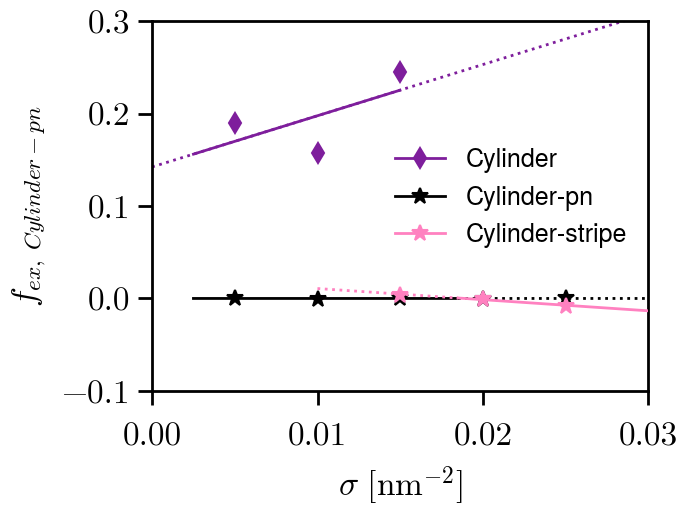

In [38]:
f = plotF('alpha', 0.25, ('cyl', 'cyl-pn', 'cyl-str'), ref_morph='cyl-pn',  show_raw=True, 
          morph_filter = {'cyl': (0.005, 0.015), 'cyl-pn': (0, 0.025), 'cyl-str': (0.010, 0.025)},
          morph_xxs = {'cyl': (2.5e-03, 0.015), 'cyl-pn': (2.5e-03, 0.015), 'cyl-str':(0.01, 0.030)}, 
          meta_xxs = {'cyl': [[0, 1]], 'cyl-pn': [[0.0185, 0.030]], 'cyl-str': [[0.010, 0.0185]]}, 
          k_dict = {'cyl-pn': 3, 'cyl': 1, 'cyl-str': 1},
          s_dict = {'cyl-pn':1e-08, 'cyl':1e-01, 'cyl-str':1e-01}
)
plt.xlim(0.0, 0.030)
plt.ylim(-0.10, 0.30)

plt.legend(handles=[
    Line2D([0], [0], **morph_ms['cyl'], label='Cylinder'),
    Line2D([0], [0], **morph_ms['cyl-pn'], label='Cylinder-pn'),
    Line2D([0], [0], **morph_ms['cyl-str'], label='Cylinder-stripe')
], loc=(0.47, 0.36), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
plt.ylabel(r'$f_{ex,\ Cylinder-pn}$', fontsize=24)

tjy.ticks()

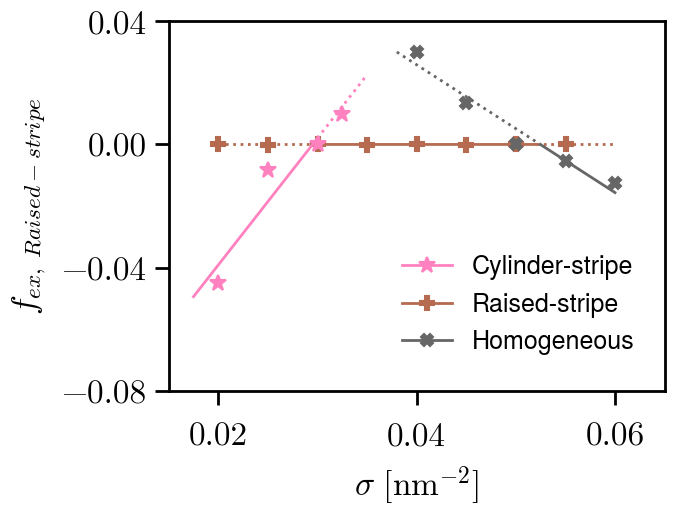

In [71]:
f = plotF('alpha', 0.25, ('raised', 'hom', 'cyl-str'), ref_morph='raised',  show_raw=True, 
          morph_filter = {'raised':(0.020,0.060), 'hom': (0.04, 0.060), 'cyl-str':(0.020, 0.033)}, 
          morph_xxs = {'hom': (0.038, 0.060), 'cyl-str':(0.0175, 0.035)},
          meta_xxs = {'cyl-str': [[0.03, 0.035]], 'raised': [[0.02, 0.03], [0.052, 0.06]], 'hom': [[0.038, 0.0525]]},
          k_dict = {'cyl': 1, 'cyl-str': 1, 'raised': 3, 'hom': 1}, 
          s_dict = {'raised':1e-07, 'cyl-str':1e-01, 'hom':1e-01}
)
plt.xlim(0.015, 0.065)
plt.ylim(-0.08, 0.04)

plt.legend(handles=[
    Line2D([0], [0], **morph_ms['cyl-str'], label='Cylinder-stripe'),
    Line2D([0], [0], **morph_ms['raised'], label='Raised-stripe'),
    Line2D([0], [0], **morph_ms['hom'], label='Homogeneous')
], loc=(0.45, 0.07), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
f[0].axes[0].set_yticks([-0.08, -0.04, 0, 0.04])
plt.ylabel(r'$f_{ex,\ Raised-stripe}$', fontsize=24)

tjy.ticks()

# Figure 7

In [37]:
pha3d = Pha3D(f7_fnames[1], f7_boxes[1], discs=(0.2,0.2,0.15), fprefix=fp)

g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
                   n_coarse=3, zmax=60.2, reflect_over='sw', write_html=True)

Wrote to C:/Users/takas/Downloads/pha_vol.html
Opening...


In [ ]:
pha3d = Pha3D(f7_fnames[2], f7_boxes[2], fprefix=fp)

g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
                   n_coarse=3, zmax=60.2, reflect_over='sw', write_html=True)

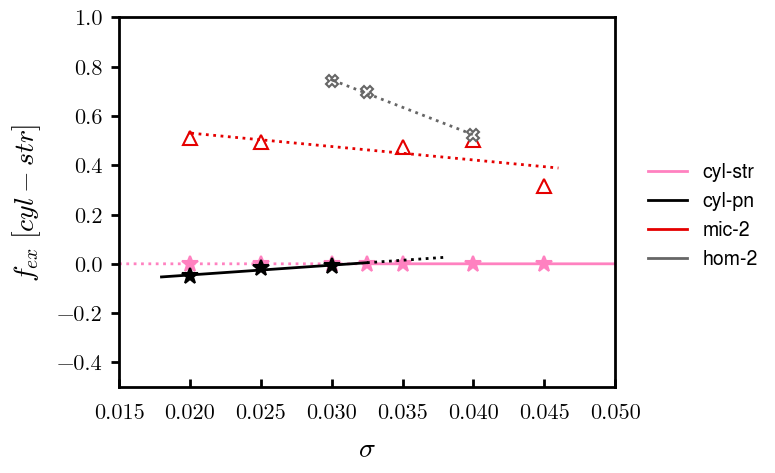

In [91]:
morph_ms = {
    'mic': {'marker':'^', 'c':'xkcd:red'  , 'ms':10}, 
    'str': {'marker':'s', 'c':'xkcd:orange', 'ms':8 }, 
    'fus': {'marker':'p', 'c':'xkcd:green', 'ms':10}, 
    'hol': {'marker':'H', 'c':'xkcd:blue' , 'ms':10}, 
    'cyl': {'marker':'d', 'c':'xkcd:purple', 'ms':10},
    'cyl-str': {'marker':'*', 'c':'xkcd:pink', 'ms':12},
    'raised': {'marker':'P', 'c':'xkcd:clay', 'ms':10},
    'hom': {'marker':'X', 'c':'0.4' , 'ms':8},
    
    'mic-2': {'marker':'^', 'c':'xkcd:red','mfc':'w',  'ms':10}, 
    'str-2': {'marker':'P', 'c':'xkcd:clay','mfc':'w', 'ms':10},
    'hom-2': {'marker':'X', 'c':'0.4','mfc':'w', 'ms':8},
}

f = plotF('alpha', 0.30, ('cyl-str','cyl-pn', 'mic-2', 'hom-2'), ref_morph='cyl-str', 
          morph_filter = {'cyl-pn':(0.019,0.035), 'cyl-str': (0,0.045), 'hom-2':(0.025, 1)}, 
          morph_xxs = {'cyl-pn': (0.018, 0.035), 'cyl-str': (0.015, 0.055)},
          meta_xxs = {'cyl-pn': [[0.0325, 0.038]], 'cyl-str': [[0, 0.0325]], 'mic-2': [[0.0201, 0.046]], 'hom-2': [[0.0301, 0.040]]},
          show_raw=True, 
          s_dict={'cyl': 1e-04, 'cyl-pn':1e-01, 'cyl-str': 1e-07, 'mic-2': 1e-01,'hom-2': 1e-01}, 
          k_dict = {'cyl': 1, 'cyl-pn':1, 'cyl-str': 3, 'mic-2': 1, 'hom-2': 1}
)
plt.xlim(0.015, 0.050)
plt.ylim(-0.5, 1.0)


plt.legend(handles=[
    Line2D([0], [0], **morph_ms['cyl-str'], label='Cylinder-stripe'),
    Line2D([0], [0], **morph_ms['raised'], label='Raised-stripe'),
    Line2D([0], [0], **morph_ms['hom'], label='Homogeneous')
], loc=(0.45, 0.07), fontsize=18)

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$', fontsize=24)
f[0].axes[0].tick_params(axis='both', direction='out', length=10, labelsize=24)
f[0].axes[0].set_yticks([-0.08, -0.04, 0, 0.04])
plt.ylabel(r'$f_{ex,\ Cylinder-stripe}$', fontsize=24)

tjy.ticks()